In [4]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as ms

In [5]:
DAT_2 = pd.read_csv('train.csv')

In [6]:
DAT_2.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
#### Listamos las columnas del dataset
DAT_2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [143]:
df = DAT_2.loc[:,["SalePrice", "MoSold", "MiscVal", "YrSold", "LotFrontage", "MSSubClass"]]

In [144]:
from sklearn.decomposition import PCA

In [145]:
df.describe()

,SalePrice,MoSold,MiscVal,YrSold,LotFrontage,MSSubClass
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000,1460.000000
mean,180921.195890,6.321918,43.489041,2007.815753,70.049958,56.897260
std,79442.502883,2.703626,496.123024,1.328095,24.284752,42.300571
min,34900.000000,1.000000,0.000000,2006.000000,21.000000,20.000000
25%,129975.000000,5.000000,0.000000,2007.000000,59.000000,20.000000
50%,163000.000000,6.000000,0.000000,2008.000000,69.000000,50.000000
75%,214000.000000,8.000000,0.000000,2009.000000,80.000000,70.000000
max,755000.000000,12.000000,15500.000000,2010.000000,313.000000,190.000000


In [146]:
df_2 = df.dropna()

In [147]:
def clean_dataset(df_2):
  assert isinstance(df_2, pd.DataFrame), "df needs to be a pd.DataFrame"
  df_2.dropna(inplace=True)
  indices_to_keep = ~df_2.isin([np.nan, np.inf, -np.inf]).any(1)
  return df_2[indices_to_keep].astype(np.float64);
df_clean = clean_dataset(df_2)

<ipython-input-147-1368cad49a75>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dropna(inplace=True)


In [148]:
n_components = 6;

In [149]:
pca = PCA(n_components=n_components)

In [150]:
reduced = pca.fit_transform(df_clean.loc[:,["SalePrice", "MoSold", "MiscVal", "YrSold", "LotFrontage", "MSSubClass"]])

In [151]:
# Append the principle components for each entry to the dataframe

for i in range(0, n_components):

  df_clean['PC' + str(i + 1)] = reduced[:, i]

display(df_clean.head())

,SalePrice,MoSold,MiscVal,YrSold,LotFrontage,MSSubClass,PC1,PC2,PC3,PC4,PC5,PC6
0,208500.0,2.0,0.0,2008.0,65.0,60.0,27729.521409,-22.388157,6.084798,-6.501210,4.394362,0.209299
1,181500.0,5.0,0.0,2007.0,80.0,20.0,729.525352,-25.423340,-38.437986,0.305860,1.294273,0.937915
2,223500.0,9.0,0.0,2008.0,68.0,60.0,42729.521534,-20.693964,6.454219,-4.914705,-2.550468,-0.477278
3,140000.0,2.0,0.0,2006.0,60.0,70.0,-40770.478733,-30.083110,11.857624,-2.899634,4.062856,2.205921
4,250000.0,12.0,0.0,2008.0,84.0,60.0,69229.522837,-17.674519,4.431206,8.269950,-5.522791,-0.768112


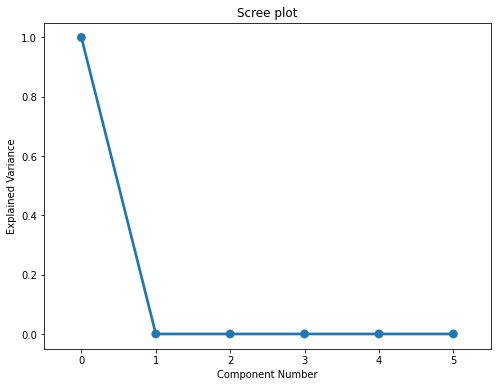

In [172]:
# Do a scree plot

ind = np.arange(0, n_components)

(fig, ax) = plt.subplots(figsize=(8, 6))

sns.pointplot(x=ind, y=pca.explained_variance_ratio_)

ax.set_title('Scree plot')

ax.set_xticks(ind)

ax.set_xticklabels(ind)

ax.set_xlabel('Component Number')

ax.set_ylabel('Explained Variance')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


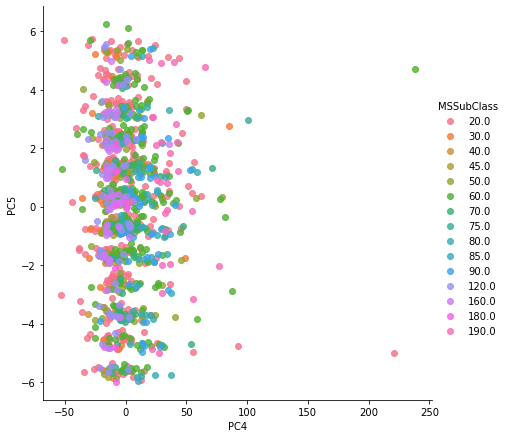

In [167]:
# Show the points in terms of the first two PCs

g = sns.lmplot('PC4',

        'PC5',

        hue='MSSubClass',data=df_clean,

        fit_reg=False,

        scatter=True,

        size=6)

plt.show()

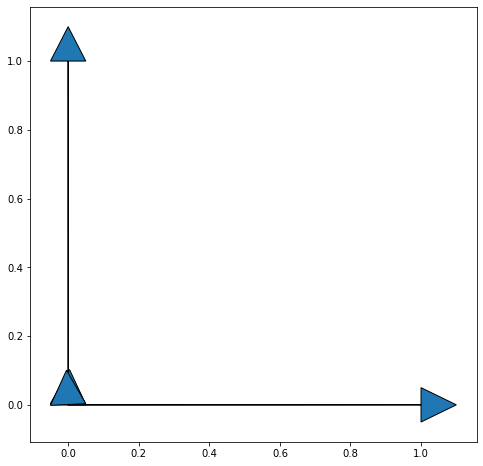

In [193]:
# Plot a variable factor map for the first two dimensions.

(fig, ax) = plt.subplots(figsize=(8, 8))

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,

        0, # Start the arrow at the origin

        pca.components_[0, i], #0 for PC1

        pca.components_[1, i], #1 for PC2
        head_width=0.1,

        head_length=0.1),

Text(0.04994866349083547, 0.05110321772020259, 'MSSubClass')

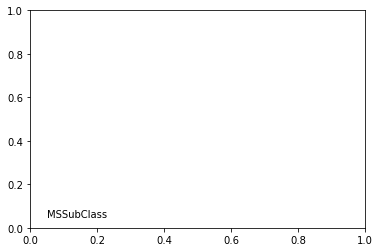

In [195]:
    plt.text(pca.components_[0, i] + 0.05,

    pca.components_[1, i] + 0.05,

    df_clean.columns.values[i])

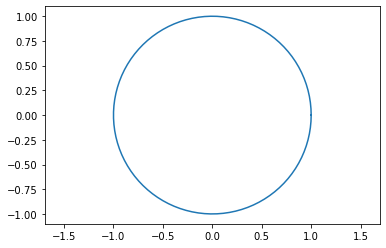

In [192]:
    an = np.linspace(0, 2 * np.pi, 100)

    plt.plot(np.cos(an), np.sin(an)) # Add a unit circle for scale

    plt.axis('equal')

    ax.set_title('Variable factor map')

    plt.show()